<a href="https://colab.research.google.com/github/antrecord/AI_python/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [5]:
# Читаем датасет
# Ссылка на датасет: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
df = pd.read_csv('/content/drug200.csv', sep=',', encoding='cp1252')

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#Обработка даных

In [6]:
# Удаляем пропуски
df = df.replace(' ', np.NaN)
df = df.dropna()
# Заменяем категориальные переменные
df = df.replace('F', 0).replace('M', 1)
df["BP"] = df["BP"].astype('category')
df["BP_ind"] = df["BP"].cat.codes
df["Cholesterol"] = df["Cholesterol"].astype('category')
df["Cholesterol_ind"] = df["Cholesterol"].cat.codes
df["Na_to_K"] = df["Na_to_K"].astype(float)

df.head()

<ipython-input-6-ea76535dd984>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('F', 0).replace('M', 1)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,BP_ind,Cholesterol_ind
0,23,0,HIGH,HIGH,25.355,DrugY,0,0
1,47,1,LOW,HIGH,13.093,drugC,1,0
2,47,1,LOW,HIGH,10.114,drugC,1,0
3,28,0,NORMAL,HIGH,7.798,drugX,2,0
4,61,0,LOW,HIGH,18.043,DrugY,1,0


In [7]:
# Удаляем категориальные столбцы
df = df.drop(['BP', 'Cholesterol'], axis=1)

In [8]:
# Создаём датасет для 3-мерной визуализации
new_df = df[['BP_ind', 'Na_to_K', 'Cholesterol_ind', 'Drug']].copy()

#Визуализация

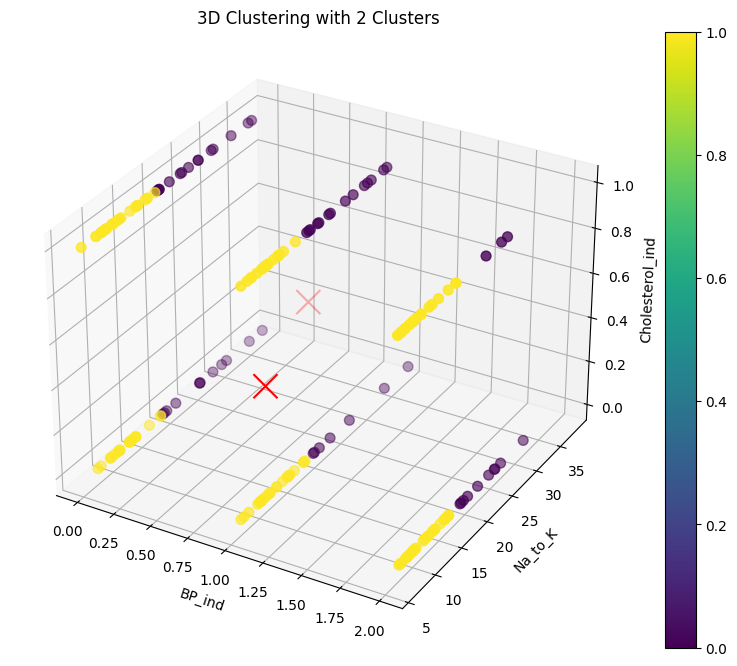

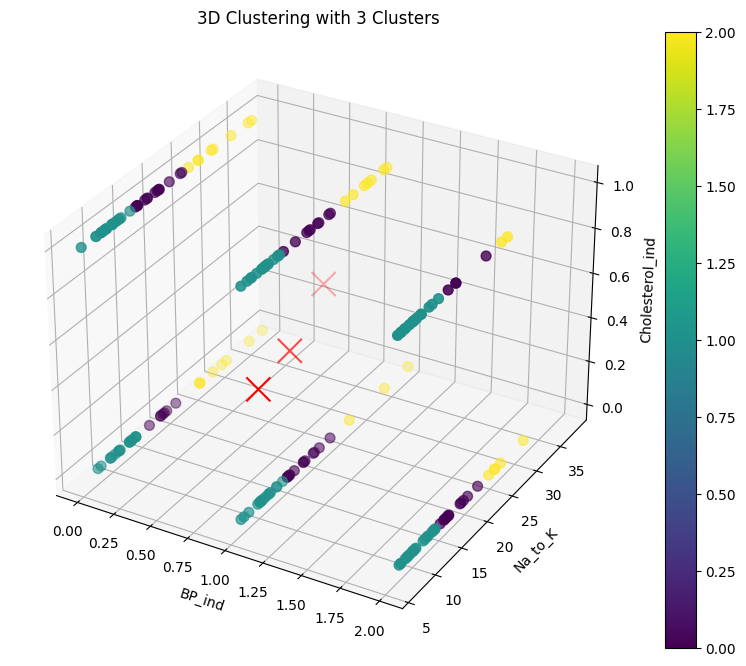

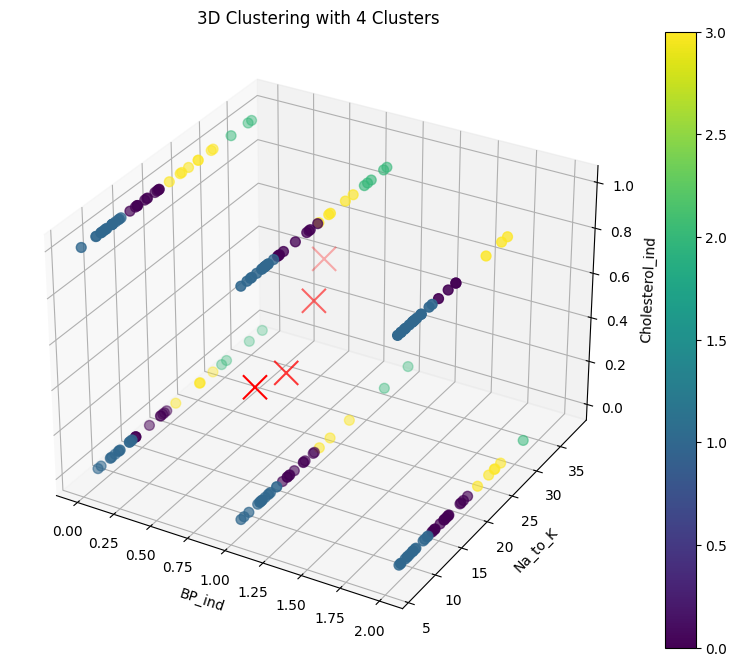

In [9]:
X = new_df.drop('Drug', axis=1)
# Функция для 3D визуализации кластеров
def plot_clusters_3d(X, labels, centers=None, title="3D Clustering"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='viridis', s=50)

    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=300, marker='x')  # Центры кластеров

    ax.set_xlabel('BP_ind')
    ax.set_ylabel('Na_to_K')
    ax.set_zlabel('Cholesterol_ind')
    ax.set_title(title)
    plt.colorbar(scatter)
    plt.show()

# Обучение KMeans для кластеров
k_values = np.arange(2, 21)
clusterings = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X) # Предсказанные значения
    centers = kmeans.cluster_centers_
    clusterings[k] = (labels, centers) # Центры кластеров

    # Выводим для 2, 3 и 4 кластеров
    if k < 5:
      # Визуализируем результаты в 3D по первым трем признакам
      plot_clusters_3d(X.iloc[:, :3], labels, centers, title=f"3D Clustering with {k} Clusters")

#Метрики

In [10]:
y = df['Drug'] # Целевая переменная
n_clusters = np.arange(2, 21)
# Поиск лучших параметров
best_metric = [0, 1, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)
    # Силуэтная оценка
    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)
    # Скорректированная случайная оценка
    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [11]:
# Выводим лучщие метрики
best_metric

[3,
 0.5599588319180294,
 0.35425715038323813,
 array([[ 0.89830508, 18.36974576,  0.47457627],
        [ 0.97222222, 10.79768519,  0.48148148],
        [ 0.72727273, 29.3009697 ,  0.51515152]])]

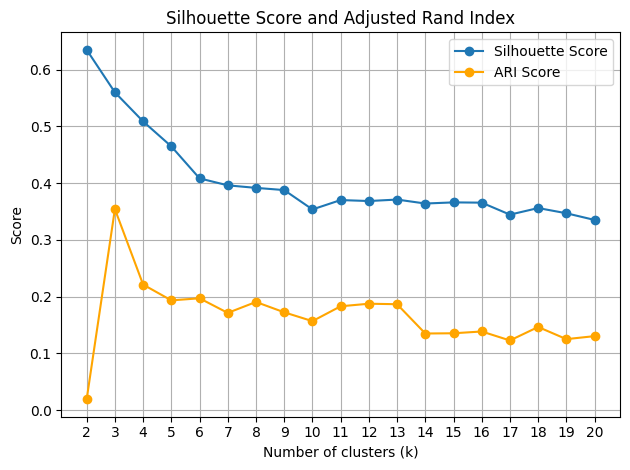

In [12]:
# График силуэтных и случайных оценок
plt.plot(n_clusters, silhouette_score_values, marker='o', label='Silhouette Score')
plt.plot(n_clusters, adjusted_rand_score_values, marker='o', color='orange', label='ARI Score')
plt.title('Silhouette Score and Adjusted Rand Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(min(k_values), max(k_values) + 1, 1))

plt.tight_layout()
plt.show()


#Выводы

Самые лучшие метрики достигаются при разбиении на 3 кластера, что соответствует реальному разбиению.

При этом случайная оценка - 0.35

Силуэтная оценка - 0.55

#DBSCAN

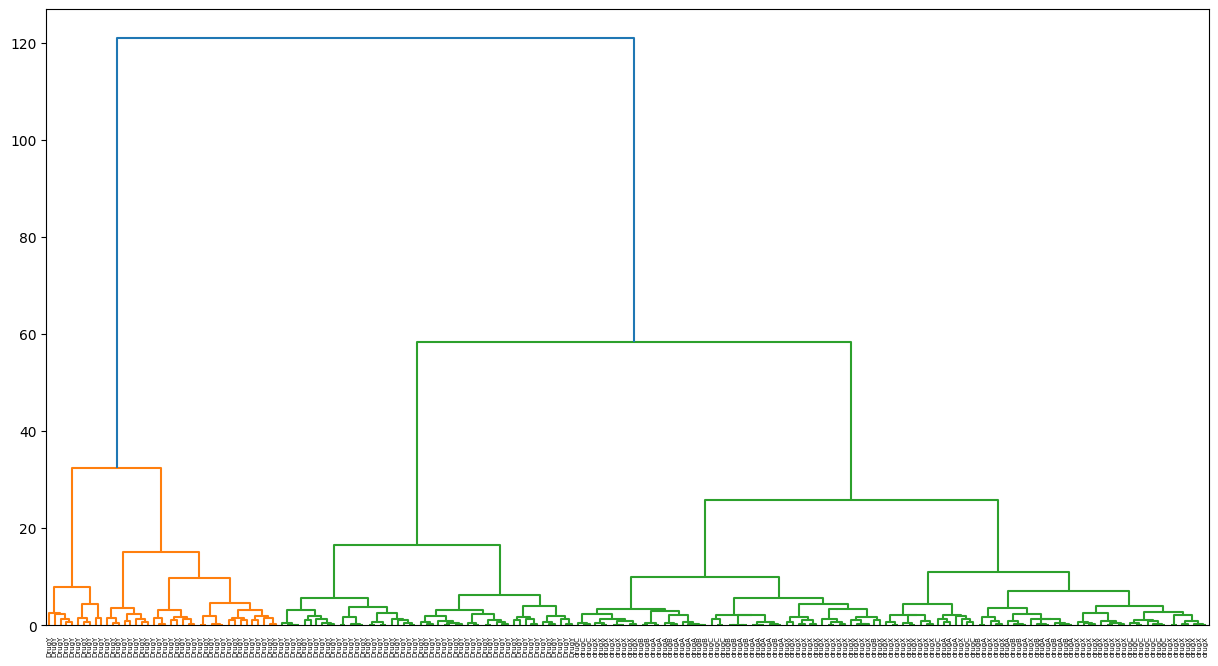

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
samples = new_df.drop(['Drug'], axis=1).values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

Видно, что получилось 3 кластера

['y', 'b', 'g', 'r']


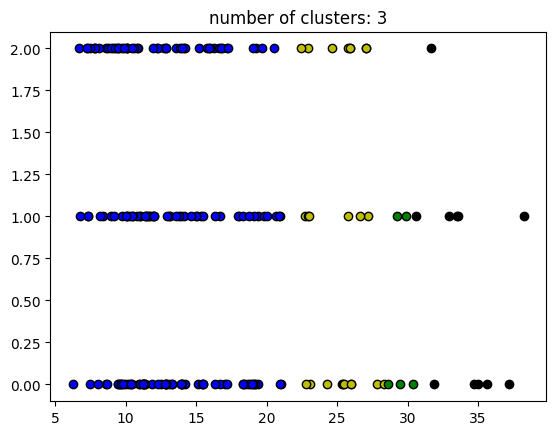

In [46]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

mins = X.shape[1]

db = DBSCAN(eps=1.7, min_samples=7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Na_to_K"], xy["BP_ind"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Na_to_K"], xy["BP_ind"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

При ручном подборе eps получилось 1,7

min_samples = 7